In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Ecommerce - UK Retailer.csv", engine='python')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.shape

(541909, 8)

In [7]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

<h1>Check for missing values in all columns and replace them with the appropriate metric 
(Mean/Median/Mode) </h1>


In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
data['CustomerID']

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

C:\Users\rasika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID'>

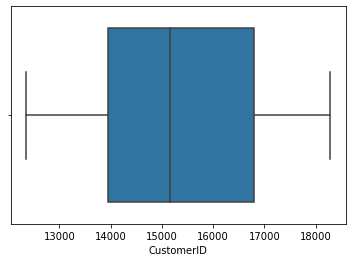

In [10]:
sns.boxplot(data['CustomerID'])

Since the distribution is not normal we will use Median to fill the null values

In [11]:
data['CustomerID'].skew()

0.02983499005167725

In [12]:
data['CustomerID']=data['CustomerID'].fillna(data['CustomerID'].median())

In [13]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [14]:
data.dropna(axis=1,inplace=True)

In [15]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<h1> Remove duplicate rows </h1>


In [16]:
data.drop_duplicates()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


<h1> Remove rows which have negative values in Quantity column </h1>

In [17]:
data['Quantity']

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 541909, dtype: int64

In [18]:
data=data[data['Quantity']>0]

In [19]:
data['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    56,    72,
         200,   600,   480,    14,    11,    33,    13,    70,   252,
          60,   216,   384,    27,    15,    22,    19,    17,    21,
          34,    47,   108,    52,    75,   270,    42,   240,    90,
         320,  1824,   204,    69,   160,  2880,  1400,    39,    26,
        1440,    31,    82,    78,    97,    98,    35,    57,   110,
         720,   156,   324,    38,    37,    49,    95,    29,    41,
         402,   378,   150,   300,    54,   104,    67,   258,    66,
          44,    55,    46,    99,    61,   408,   972,   208,  1008,
        1000,  1488,   250,  1394,   400,    79,    84,   272,   113,
          45,   106,    68,   267,   115,    65,  1728,    53,    76,
         460,    71,

 <h1>Add the columns - Month, Day and Hour for the invoice</h1>

In [20]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [21]:
data['Month']=pd.DatetimeIndex(data['InvoiceDate']).month

In [22]:
data['Year']=pd.DatetimeIndex(data['InvoiceDate']).year

In [23]:
data['Hour']=pd.DatetimeIndex(data['InvoiceDate']).hour

In [24]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,2010,8
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8


In [25]:
data['Quantity'].sum()

5660981

<h1> How many orders made by the customers? </h1>

In [26]:
 
data.groupby(['CustomerID'])['Quantity'].sum()

CustomerID
12346.0    74215
12347.0     2458
12348.0     2341
12349.0      631
12350.0      197
           ...  
18280.0       45
18281.0       54
18282.0      103
18283.0     1397
18287.0     1586
Name: Quantity, Length: 4339, dtype: int64

In [105]:
Total_Quantity=data['Quantity'].sum()
Total_Quantity

5660981

In [106]:
Total_Orders=data["InvoiceNo"].count()
Total_Orders

531285

<h1> TOP 5 customers with higher number of orders </h1>

In [27]:
data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(5)

CustomerID
15152.0    481989
14646.0    197491
16446.0     80997
14911.0     80515
12415.0     77670
Name: Quantity, dtype: int64

In [107]:
data.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False).head(5)

CustomerID
15152.0    133632
17841.0      7847
14911.0      5677
14096.0      5111
12748.0      4596
Name: InvoiceNo, dtype: int64

<h1> 8. How much money spent by the customers?  </h1>


In [28]:
data.groupby('CustomerID')['UnitPrice'].sum()

CustomerID
12346.0       1.04
12347.0     481.21
12348.0     178.71
12349.0     605.10
12350.0      65.30
            ...   
18280.0      47.65
18281.0      39.36
18282.0      62.39
18283.0    1220.93
18287.0     104.55
Name: UnitPrice, Length: 4339, dtype: float64

In [98]:
data['UnitPrice'].sum()

2049323.6539999994

<h1>9. TOP 5 customers with highest money spent  </h1>


In [29]:
data.groupby('CustomerID')['UnitPrice'].sum().sort_values(ascending=False).head(5)

CustomerID
15152.0    810264.76
14096.0     33332.45
14911.0     26185.72
17841.0     19848.49
12744.0     12949.99
Name: UnitPrice, dtype: float64

 <h1> 10. How many orders per month?  </h1>


In [30]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,2010,8
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8


In [31]:
Per_Month=data.groupby(['Month'])['InvoiceNo'].count()

In [32]:
Per_Month

Month
1     34350
2     27184
3     35915
4     29171
5     36292
6     36056
7     38716
8     34566
9     49323
10    59396
11    83498
12    66818
Name: InvoiceNo, dtype: int64

In [33]:
Order_Per_Month=pd.DataFrame(Per_Month)

In [34]:
Order_Per_Month=Order_Per_Month.reset_index()
Order_Per_Month

,Month,InvoiceNo
0,1,34350
1,2,27184
2,3,35915
3,4,29171
4,5,36292
5,6,36056
6,7,38716
7,8,34566
8,9,49323
9,10,59396


In [35]:
Orders_Per_Month=[]
for i in range (len(Order_Per_Month)):
#     print(Order_Per_Month['InvoiceNo'].iloc[i])
    try:
        Orders_Per_Month.append(Order_Per_Month['InvoiceNo'].iloc[i]-Order_Per_Month['InvoiceNo'].iloc[i+1])
    except:
        print("Index out of bounds")

        
Orders_Per_Month.append(66818)
        
Orders_Per_Month=pd.DataFrame(Orders_Per_Month)

Orders_Per_Month



Index out of bounds


,0
0,7166
1,-8731
2,6744
3,-7121
4,236
5,-2660
6,4150
7,-14757
8,-10073
9,-24102


In [36]:
Order_Per_Month['Order_Per_Month']=Orders_Per_Month
# Order_Per_Month.drop('index',axis="columns",inplace=True)


 <h1> Orders per month </h1>

In [37]:
Order_Per_Month.abs()

,Month,InvoiceNo,Order_Per_Month
0,1,34350,7166
1,2,27184,8731
2,3,35915,6744
3,4,29171,7121
4,5,36292,236
5,6,36056,2660
6,7,38716,4150
7,8,34566,14757
8,9,49323,10073
9,10,59396,24102


<h1> 1. How many orders per day? </h1>


In [38]:
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,2010,8
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,12,2011,12
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,12,2011,12
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,12,2011,12
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,12,2011,12


In [39]:
day=pd.DatetimeIndex(data['InvoiceDate']).day

In [40]:
day

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='InvoiceDate', length=531285)

In [41]:
Order_Per_Day=pd.DataFrame(day)
Order_Per_Day.rename(columns={"InvoiceDate":"Day"},inplace=True)
Order_Per_Day

,Day
0,1
1,1
2,1
3,1
4,1
...,...
531280,9
531281,9
531282,9
531283,9


In [42]:
Order_Per_Day['Day'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 19, 20,
       21, 22, 23,  4, 11, 18, 24, 25, 26, 27, 28, 30, 31, 29],
      dtype=int64)

In [43]:
data.head(2)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8


In [44]:
Order_Per_Day['InvoiceNo']=data['InvoiceNo']

In [45]:
Order_Per_Day

,Day,InvoiceNo
0,1,536365
1,1,536365
2,1,536365
3,1,536365
4,1,536365
...,...,...
531280,9,580911
531281,9,580911
531282,9,580911
531283,9,580911


In [46]:
Order_Per_Day=Order_Per_Day.groupby("Day")["InvoiceNo"].count()

In [47]:
Order_Per_Day=pd.DataFrame(Order_Per_Day)
Order_Per_Day=Order_Per_Day.reset_index()
Order_Per_Day
# Order_Per_Day.drop("index",axis="columns",inplace=True)

,Day,InvoiceNo
0,1,16920
1,2,16143
2,3,13916
3,4,18933
4,5,21198
5,6,23030
6,7,22162
7,8,23699
8,9,17420
9,10,19147


In [48]:
Order_Per_Day.drop("level_0",axis="columns",inplace=True)

KeyError: "['level_0'] not found in axis"

<h1> orders per day </h1>

In [49]:
Order_Per_Day

,Day,InvoiceNo
0,1,16920
1,2,16143
2,3,13916
3,4,18933
4,5,21198
5,6,23030
6,7,22162
7,8,23699
8,9,17420
9,10,19147


In [50]:
Orders_Per_Day=[]
for i in range (len(Order_Per_Day)):
#     print(Order_Per_Day['InvoiceNo'].iloc[i])
    try:
        Orders_Per_Day.append(Order_Per_Day['InvoiceNo'].iloc[i] - Order_Per_Day['InvoiceNo'].iloc[i+1])
    except:
        print("Index out of bounds")

        
Orders_Per_Day.append(9916)
        
Orders_Per_Day=pd.DataFrame(Orders_Per_Day,columns=["Order_per_Day"])

Orders_Per_Day=Orders_Per_Day.abs()

Orders_Per_Day

Index out of bounds


,Order_per_Day
0,777
1,2227
2,5017
3,2265
4,1832
5,868
6,1537
7,6279
8,1727
9,1588


<h1> 12 How many orders per hour? </h1>

In [51]:
Order_Per_Hour=data.groupby('Hour')['InvoiceNo'].count()

In [52]:
Order_Per_Hour=pd.DataFrame(Order_Per_Hour)

In [53]:
Order_Per_Hour=Order_Per_Hour.reset_index()

In [54]:
Order_Per_Hour['InvoiceNo']

0         1
1       379
2      8805
3     33755
4     47895
5     56312
6     77230
7     71075
8     66268
9     76432
10    53451
11    27635
12     7729
13     3516
14      802
Name: InvoiceNo, dtype: int64

In [55]:
Order_Per_Hour['InvoiceNo'].iloc[0]

1

In [56]:
x=[]
for i in range (len(Order_Per_Hour)):
    print(Order_Per_Hour['InvoiceNo'].iloc[i])
    try:
        x.append(Order_Per_Hour['InvoiceNo'].iloc[i]-Order_Per_Hour['InvoiceNo'].iloc[i+1])
    except:
        print("Index out of bounds")

1
379
8805
33755
47895
56312
77230
71075
66268
76432
53451
27635
7729
3516
802
Index out of bounds


In [57]:
x.append(9587)

In [58]:
Order_Per_Hour['per order']=x

In [59]:

Order_Per_Hour.abs()


,Hour,InvoiceNo,per order
0,6,1,378
1,7,379,8426
2,8,8805,24950
3,9,33755,14140
4,10,47895,8417
5,11,56312,20918
6,12,77230,6155
7,13,71075,4807
8,14,66268,10164
9,15,76432,22981


<h1> 13. How many orders for each country? <h1>

In [60]:
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,2010,8
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,12,2011,12
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,12,2011,12
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,12,2011,12
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,12,2011,12


In [61]:
data['Country'].value_counts()

United Kingdom          486286
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

<h1> 14 Orders trend across months </h1>

In [62]:
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,2010,8
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,12,2011,12
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,12,2011,12
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,12,2011,12
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,12,2011,12


In [63]:
data.groupby(['Month'])['InvoiceNo'].count()

Month
1     34350
2     27184
3     35915
4     29171
5     36292
6     36056
7     38716
8     34566
9     49323
10    59396
11    83498
12    66818
Name: InvoiceNo, dtype: int64

<h1> How much money spent by each country? </h1>

In [64]:
data.groupby('Country')['UnitPrice'].sum()

Country
Australia               3.612500e+03
Austria                 1.693900e+03
Bahrain                 8.276000e+01
Belgium                 7.372850e+03
Brazil                  1.426000e+02
Canada                  9.105800e+02
Channel Islands         3.389650e+03
Cyprus                  3.506180e+03
Czech Republic          7.827000e+01
Denmark                 1.195550e+03
EIRE                    3.848995e+04
European Community      2.898000e+02
Finland                 3.628440e+03
France                  3.699279e+04
Germany                 3.353214e+04
Greece                  6.632900e+02
Hong Kong               6.666740e+03
Iceland                 4.812100e+02
Israel                  1.070980e+03
Italy                   3.576210e+03
Japan                   6.572100e+02
Lebanon                 2.424400e+02
Lithuania               9.944000e+01
Malta                   5.451900e+02
Netherlands             6.247730e+03
Norway                  5.662470e+03
Poland                  1.3772

<h1>Graph Section <h1>

In [65]:
data.head(3)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,2010,8


In [66]:
data.describe()

,Quantity,UnitPrice,CustomerID,Month,Year,Hour
count,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000
mean,10.655262,3.857296,15258.591795,7.560244,2010.921543,13.076259
std,156.830323,41.810047,1483.926547,3.508717,0.268890,2.438303
min,1.000000,-11062.060000,12346.000000,1.000000,2010.000000,6.000000
25%,1.000000,1.250000,14388.000000,5.000000,2011.000000,11.000000
50%,3.000000,2.080000,15152.000000,8.000000,2011.000000,13.000000
75%,10.000000,4.130000,16261.000000,11.000000,2011.000000,15.000000
max,80995.000000,13541.330000,18287.000000,12.000000,2011.000000,20.000000


<h1>Boxplot – All Numeric Variables</h1>

In [67]:
Numeric_data=data._get_numeric_data()

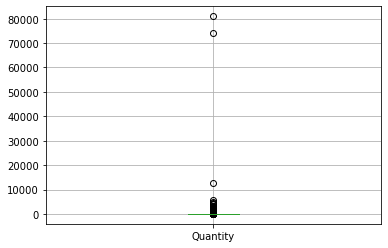

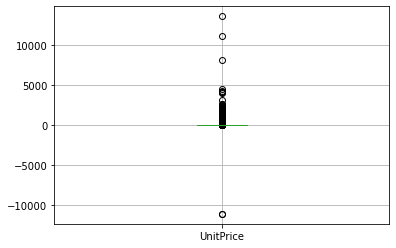

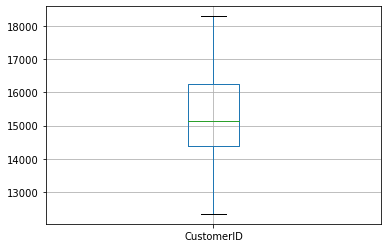

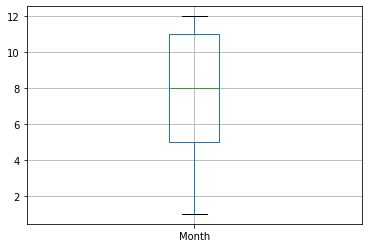

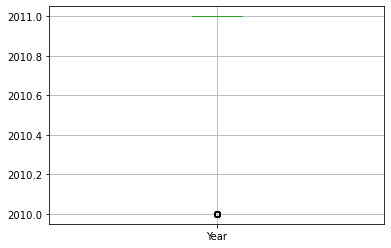

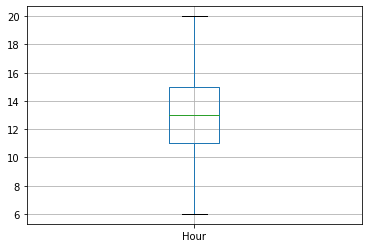

In [68]:
import matplotlib.pyplot as plt

for column in Numeric_data:
    plt.figure()
    Numeric_data.boxplot([column])

 <h1>Histogram – All Numeric Variables </h1>


<Figure size 432x288 with 0 Axes>

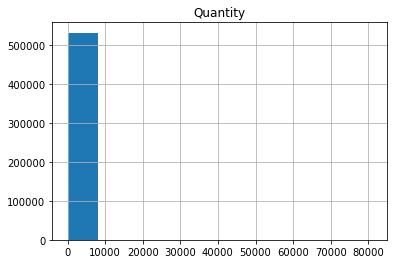

<Figure size 432x288 with 0 Axes>

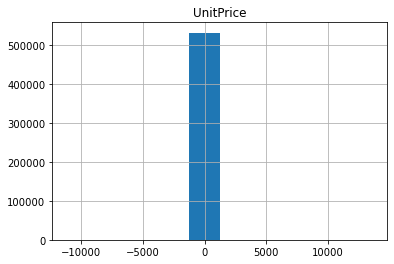

<Figure size 432x288 with 0 Axes>

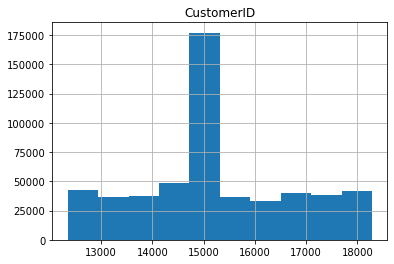

<Figure size 432x288 with 0 Axes>

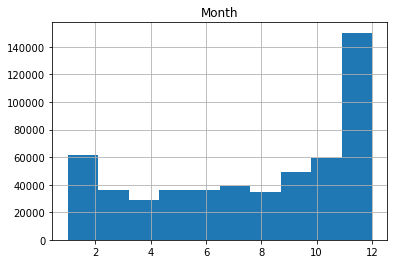

<Figure size 432x288 with 0 Axes>

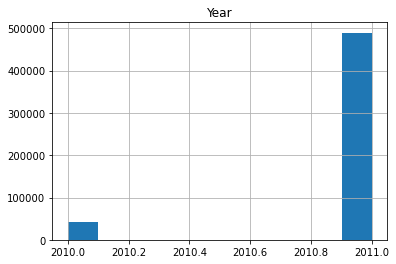

<Figure size 432x288 with 0 Axes>

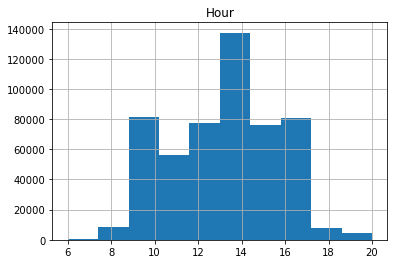

In [69]:
for column in Numeric_data:
    plt.figure()
    Numeric_data.hist([column])

In [70]:
Numeric_data=data.select_dtypes(include=['int64'])

<h1>Aggregation for all numerical Columns </h1>

In [71]:
data.describe()

,Quantity,UnitPrice,CustomerID,Month,Year,Hour
count,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000
mean,10.655262,3.857296,15258.591795,7.560244,2010.921543,13.076259
std,156.830323,41.810047,1483.926547,3.508717,0.268890,2.438303
min,1.000000,-11062.060000,12346.000000,1.000000,2010.000000,6.000000
25%,1.000000,1.250000,14388.000000,5.000000,2011.000000,11.000000
50%,3.000000,2.080000,15152.000000,8.000000,2011.000000,13.000000
75%,10.000000,4.130000,16261.000000,11.000000,2011.000000,15.000000
max,80995.000000,13541.330000,18287.000000,12.000000,2011.000000,20.000000


<h1> Unique Values across all columns </h1>

In [72]:
for column in data:
    print("\n \n Unique Values in Columns ",column, "=",data[column].unique())


 
 Unique Values in Columns  InvoiceNo = ['536365' '536366' '536367' ... '581585' '581586' '581587']

 
 Unique Values in Columns  StockCode = ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']

 
 Unique Values in Columns  Quantity = [    6     8     2    32     3     4    24    12    48    18    20    36
    80    64    10   120    96    23     5     1    50    40   100   192
   432   144   288    16     9   128    25    30    28     7    56    72
   200   600   480    14    11    33    13    70   252    60   216   384
    27    15    22    19    17    21    34    47   108    52    75   270
    42   240    90   320  1824   204    69   160  2880  1400    39    26
  1440    31    82    78    97    98    35    57   110   720   156   324
    38    37    49    95    29    41   402   378   150   300    54   104
    67   258    66    44    55    46    99    61   408   972   208  1008
  1000  1488   250  1394   400    79    84   272   113    45   106    68
   267   115    65  1728   

<h1>Duplicate values across all columns </h1>

In [73]:
data[data.duplicated()]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Hour
517,536409,21866,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,12,2010,11
527,536409,22866,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,12,2010,11
537,536409,22900,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,12,2010,11
539,536409,22111,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,12,2010,11
555,536412,22327,1,12/1/2010 11:49,2.95,17920.0,United Kingdom,12,2010,11
...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,1,12/9/2011 11:34,0.39,14446.0,United Kingdom,12,2011,11
541689,581538,23318,1,12/9/2011 11:34,2.49,14446.0,United Kingdom,12,2011,11
541692,581538,22992,1,12/9/2011 11:34,1.95,14446.0,United Kingdom,12,2011,11
541699,581538,22694,1,12/9/2011 11:34,2.10,14446.0,United Kingdom,12,2011,11


<h1> Correlation – Heatmap - All Numeric Variables </h1>

<AxesSubplot:>

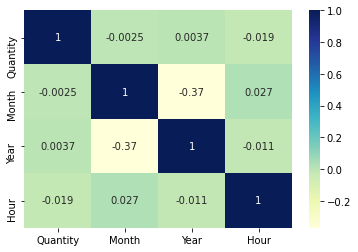

In [74]:
sns.heatmap(Numeric_data.corr(),cmap='YlGnBu',annot=True)

<h1>  Regression Plot - All Numeric Variables </h1>

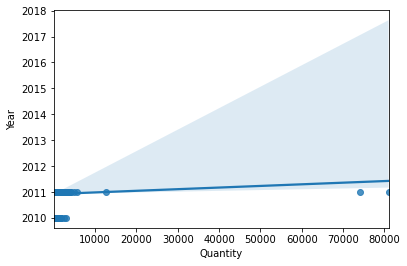

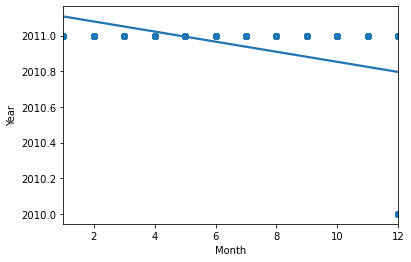

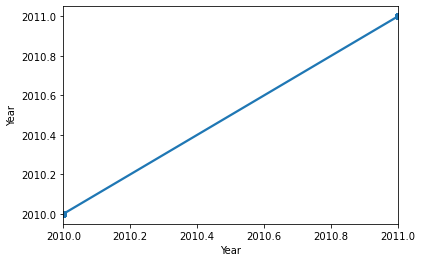

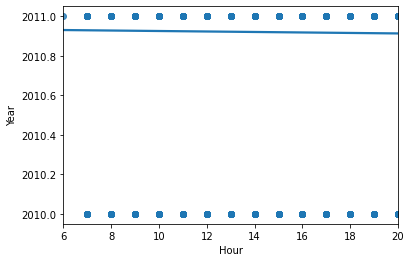

In [75]:
for column in Numeric_data:
    plt.figure()
    sns.regplot(x=Numeric_data[column],y=data['Year'])

<h1>   Plot the skewness - All Numeric Variables </h1>

In [76]:
skew=Numeric_data.skew(axis=0)
print(skew)

Quantity    460.130967
Month        -0.417780
Year         -3.135448
Hour          0.000429
dtype: float64


<h1>. Pair plot - All Numeric Variables  </h1>


In [ ]:
# for column in Numeric_data:
#     plt.figure()
sns.pairplot(Numeric_data)

<h1> Line chart to show the trend of data - All Numeric/Date Variables </h1>

In [82]:
time=Numeric_data.drop('Quantity',axis="columns")
time=pd.DataFrame(time)

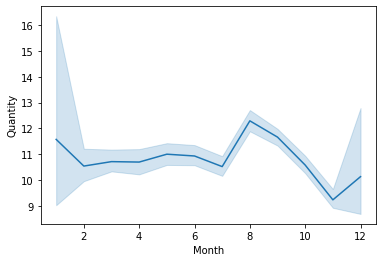

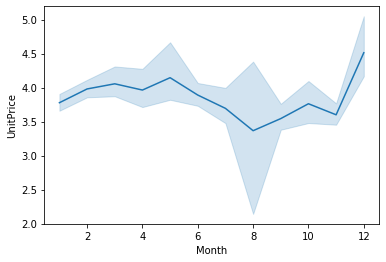

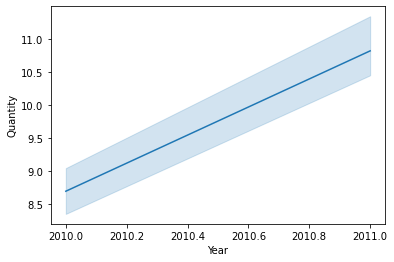

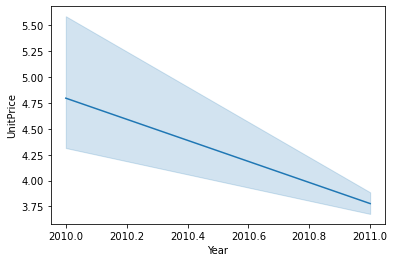

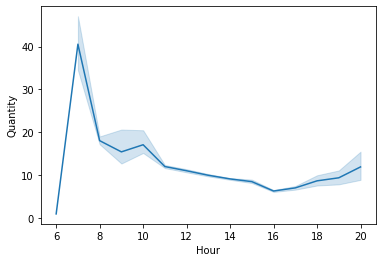

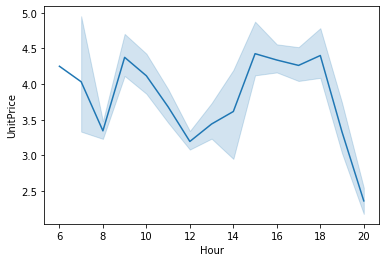

In [83]:

for column in time:
    plt.figure()
    sns.lineplot(x=time[column],y=Numeric_data['Quantity'])
    plt.figure()
    sns.lineplot(x=time[column],y=data['UnitPrice'])
    

    

<h1>  Bar Plot – Every Categorical Variable vs every Numerical Variable </h1>


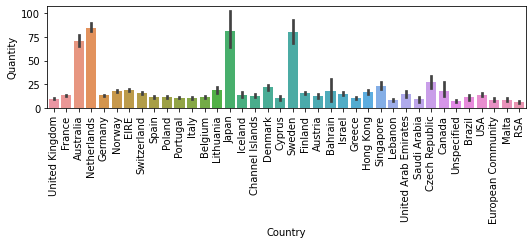

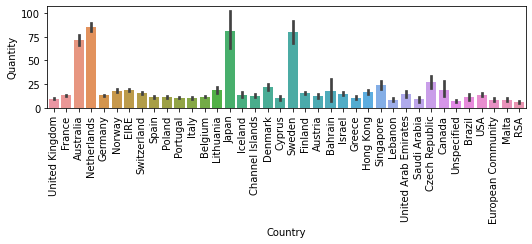

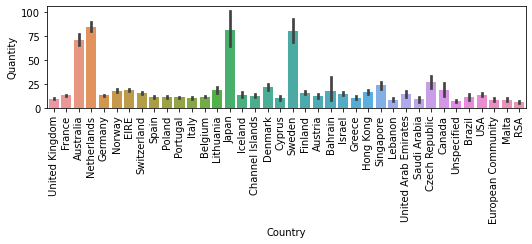

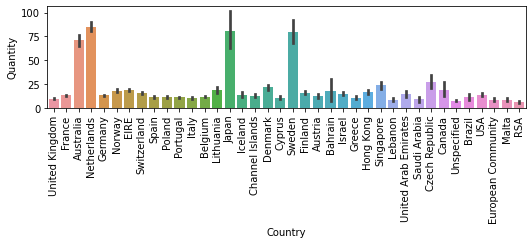

In [92]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
for column in Numeric_data:
    plt.figure()
    sns.barplot(x=data['Country'],y=Numeric_data['Quantity'])
    plt.xticks(rotation=90)
    plt.show()
    

<h1>. Distribution Plot – All Numeric Variables </h1>

C:\Users\rasika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rasika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rasika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

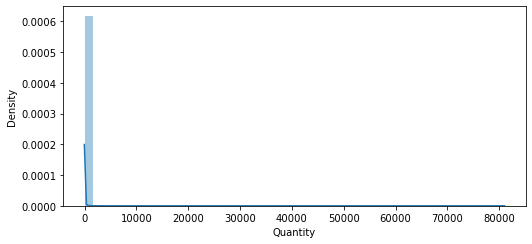

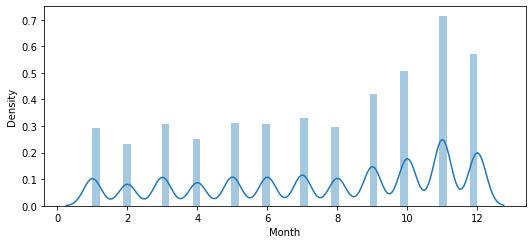

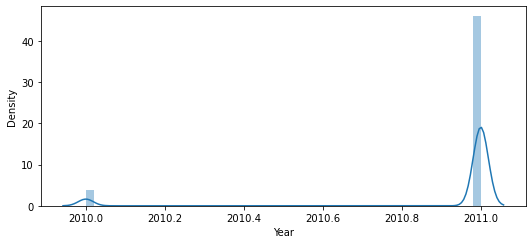

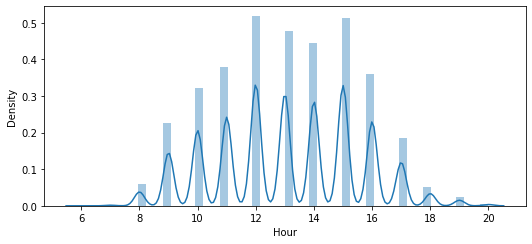

In [97]:
for column in Numeric_data:
     plt.figure()
     sns.distplot(Numeric_data[column])